## n-player Reinforcement learning 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FormatStrFormatter
import random
import scipy.stats as st
import collections
from sklearn.preprocessing import normalize


In [2]:
def numfmt(x, pos): # your custom formatter function: divide by 1000.0
    s = '{}'.format(x / 1000.0)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting
yfmt = tkr.FuncFormatter(numfmt)    # create your custom formatter function

lable_font = 24
tick_font =18

In [3]:
b2 = -6 # quadratic benefit coefficient for task X
beta =3 # slope of benefit for task Y (eg. brood care)

In [4]:
#  Total Benefit Accrue to Individuals Inside a Game
def benefit(G,b1,w):
    
    G=np.array(G)
    X = np.sum(G==0)
    Y = np.sum(G==1)
    total_engagement_in_task_X = np.sum(G==0) 
    total_engagement_in_task_Y = np.sum(G==1)
    
#     B_X = max((b2*(total_engagement_in_task_X**2) + (b1*total_engagement_in_task_X)) , 0)
    B_X = b2*(total_engagement_in_task_X**2) + (b1*total_engagement_in_task_X) 
    B_Y = (1)/(1+ ((1-w*total_engagement_in_task_Y)/(w*total_engagement_in_task_Y))**beta)
    B_total = (1/n)*(B_X)* B_Y
    return(B_total)

def cost(player,b1,w):
    if player==0:
        return (0)
    elif player==1:
        return(0)
    else:
        return(-1)


# Payoff Array of the Individuals Inside a Game
def payoffGame(G,b1,w):

    B = np.array(benefit(G,b1,w))
    C = np.array(list(map(cost,G,[b1]*len(G),[w]*len(G))))
    return ((1/10)*(B-C))


In [5]:
intensity =1

In [6]:
eps =0.0001

## n-player Cross-learning 

In [7]:
def payoffGame_and_update(G):
    '''
    G[][0]= strategy task 0
    G[][1]= strategy task 1
    G[][2]= id of the player
    G[][3]= action
    G[][4]= immidiate payoff
    G[][5]= trajectory of strategy task 0
    G[][6]= trajectory of strategy task 1
    
    '''
    A=[]
    for i in range(n):
        a = np.random.choice([0,1,2],1,p=np.array([G[i][0],G[i][1],1-(G[i][0]+G[i][1])]))
        A.append(a)
        G[i][3].append(a)
        
    payoffs = payoffGame(A,b1,w)


    for i in range(n):
        G[i][4].append(payoffs[i])
        if A[i]==0:
            G[i][0] = G[i][0] + alpha * (payoffs[i] - payoffs[i]* G[i][0])
            G[i][1] = G[i][1] + alpha * ( - payoffs[i]* G[i][1])

        elif A[i]==1:
            G[i][0] = G[i][0] + alpha * ( - payoffs[i]* G[i][0])
            G[i][1] = G[i][1] + alpha * (payoffs[i] - payoffs[i]* G[i][1])
 
        elif A[i]==2:
            G[i][0] = G[i][0] + alpha * ( - payoffs[i]* G[i][0])
            G[i][1] = G[i][1] + alpha * ( - payoffs[i]* G[i][1])

    return(list(G))

In [8]:
alpha = 0.001
time = 50000
n=5

In [16]:
def run():
    
    plt.rcParams["font.family"] = "sans-serif"
    font = FontProperties()


    for x,y in [[0.4,0.4]]:

        popSize = 20

        init_population = []
        for i in range(popSize):
            init_population=init_population+[[x,y,i,[],[],[x],[y] ]]




        population = np.array(init_population) 




        all_id=[]
        all_traitX=[]
        all_traitY=[]
        all_actions =[]
        all_rewards =[]
        all_strategiesX =[]
        all_strategiesY =[]
        all_traitX.append(population[:,0])
        all_traitY.append(population[:,1])
        all_id.append(population[:,2])
        all_actions.append(population[:,3])
        all_rewards.append(population[:,4])
        all_strategiesX.append(population[:,5])
        all_strategiesY.append(population[:,6])



        for t in range(0,time):
            np.random.shuffle(population)
            allGames = np.split(population,int(popSize/n))
            pop = np.array(list(map(payoffGame_and_update, allGames)))
            pop = pop.reshape(popSize,7)
            population=np.copy(pop)
            all_traitX.append(population[:,0])
            all_traitY.append(population[:,1])
            all_id.append(population[:,2])




    fig, ax = plt.subplots()
    ax.set_aspect('20000')
    ax.set_facecolor('#F2F2F2')
    ax.locator_params(axis='x', nbins=4)
    for i in range(popSize):
        ax.plot(range(time+1), np.array(all_traitX)[np.array(all_id)==i], '.', color='#3D59AB', markersize=0.05,label='x')

    ax.set_xlabel(r'time ($\times 10^3 $)', fontsize=lable_font,fontweight="bold")
    ax.set_ylabel(r'$\pi_X$', fontsize=lable_font,fontweight="bold")

    ax.set_xticklabels(ax.get_xticks(),fontsize=tick_font)
    ax.set_yticklabels(ax.get_yticks(),fontsize=tick_font)


    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    ax.xaxis.set_major_formatter(yfmt)
    ax.margins(0)
    plt.ylim((-0.01,1.01))


    fig, ax2 = plt.subplots()
    ax2.set_aspect('20000')
    ax2.set_facecolor('#F2F2F2')
    ax2.locator_params(axis='x', nbins=4)
    for i in range(popSize):
        ax2.plot(range(time+1), np.array(all_traitY)[np.array(all_id)==i], '.',color='seagreen', markersize=0.05,label='y')

    ax2.set_xlabel(r'time ($\times 10^3 $)', fontsize=lable_font,fontweight="bold")
    ax2.set_ylabel(r'$\pi_Y$', fontsize=lable_font,fontweight="bold")

    ax2.set_xticklabels(ax2.get_xticks(),fontsize=tick_font)
    ax2.set_yticklabels(ax2.get_yticks(),fontsize=tick_font)


    ax2.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    ax2.xaxis.set_major_formatter(yfmt)
    ax2.margins(0)
    plt.ylim((-0.01,1.01))



    fig, ax3 = plt.subplots()
    ax3.set_aspect('20000')
    ax3.set_facecolor('#F2F2F2')
    ax3.locator_params(axis='x', nbins=4)
    for i in range(popSize):
        ax3.plot(range(time+1), 1-np.array(all_traitX)[np.array(all_id)==i] - np.array(all_traitY)[np.array(all_id)==i], '.',color='#FF8000',markersize=0.05, label='z')

    ax3.set_xlabel(r'time ($\times 10^3 $)', fontsize=lable_font,fontweight="bold")
    ax3.set_ylabel(r'$\pi_Z$', fontsize=lable_font,fontweight="bold")

    ax3.set_xticklabels(ax3.get_xticks(),fontsize=tick_font)
    ax3.set_yticklabels(ax3.get_yticks(),fontsize=tick_font)


    ax3.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    ax3.xaxis.set_major_formatter(yfmt)
    ax3.margins(0)



    plt.ylim((-0.01,1.01))
    plt.grid(False)
    plt.show()

       

/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3

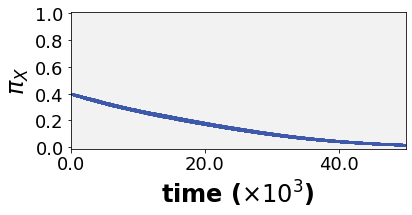

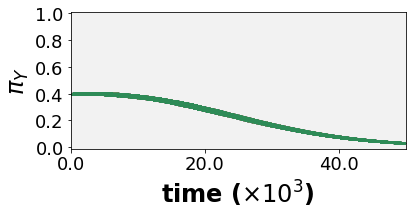

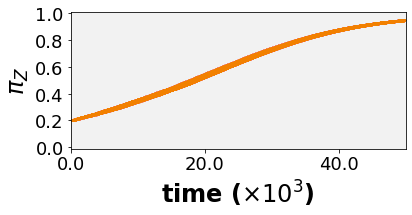

In [17]:
b1 = 16
w = 0.2
run()


/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3

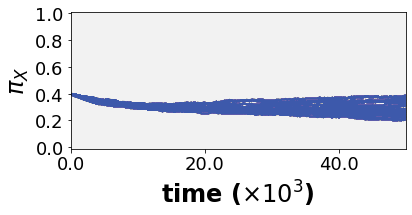

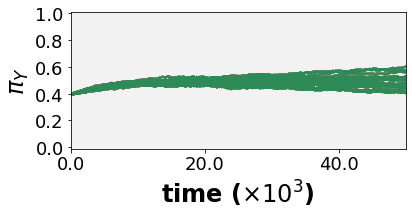

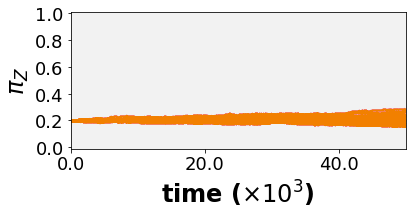

In [18]:
b1 = 24
w = 0.3
run()

/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3

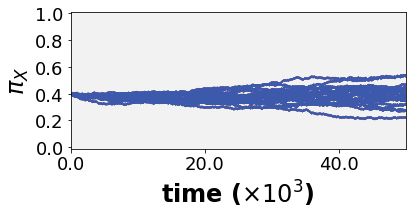

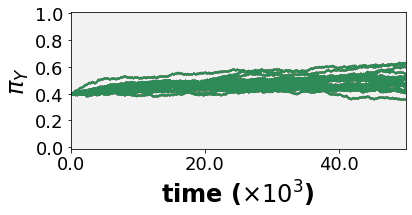

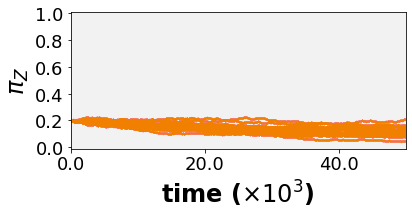

In [19]:
b1 = 28
w = 0.3
run()

/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mkha0093/anaconda3

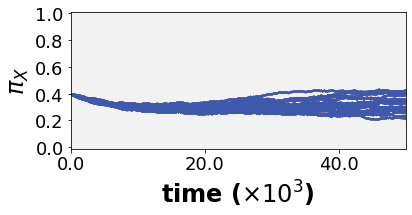

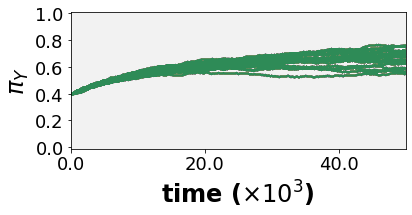

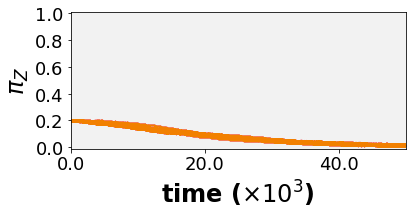

In [20]:
b1 = 30
w = 0.2
run()